<ipython-input-2-25ddaf79e4da>:90: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparen" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("mirror.png", transparen = True)


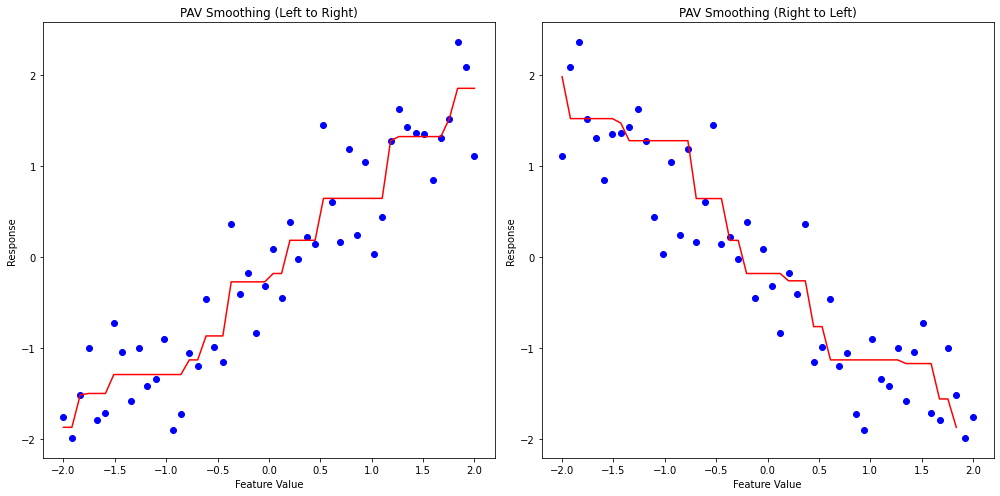

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.isotonic import IsotonicRegression
# right side adjusted

def pav_down(y):
    """
    PAV algorithm for monotonic decreasing data.
    
    :param y: List of numbers to smooth.
    :return: Smoothed list of numbers with the same length as the input.
    """
    n = len(y)
    if n == 0:
        return []
    
    # Initialize the values of blocks and their ranges
    block_values = [y[0]]
    block_limits = [0]

    # Iterate through each data point in the sequence
    for i in range(1, n):
        # Add a new block
        block_values.append(y[i])
        block_limits.append(i)

        # Check and merge blocks that violate monotonicity
        while len(block_values) > 1 and block_values[-1] > block_values[-2]:
            # Merge the last two blocks
            new_value = ((block_limits[-1] - block_limits[-2]) * block_values[-2] + 
                         block_values[-1]) / (block_limits[-1] - block_limits[-2] + 1)
            block_values[-2] = new_value
            block_values.pop()
            block_limits.pop(-2)

    # Create the smoothed sequence, filling the corresponding range with the value of each block
    smoothed_y = []
    for i in range(len(block_values)):
        start = block_limits[i]
        end = block_limits[i + 1] if i + 1 < len(block_limits) else n
        smoothed_y.extend([block_values[i]] * (end - start))

    return smoothed_y

# Generate a set of random data
np.random.seed(42)
X = np.linspace(-2, 2, 50)
noise = np.random.normal(0, 0.5, X.shape)
Y = X + noise

# Sort from left to right
indices_left_to_right = np.argsort(X)
X_left_to_right = X[indices_left_to_right]
Y_left_to_right = Y[indices_left_to_right]

# Sort from right to left
indices_right_to_left = np.argsort(X)[::-1]
# X_right_to_left = X[indices_right_to_left]
X_right_to_left = X_left_to_right
Y_right_to_left = Y[indices_right_to_left]

# Apply PAV algorithm for smoothing
ir_left_to_right = IsotonicRegression(out_of_bounds='clip')
Y_smoothed_left_to_right = ir_left_to_right.fit_transform(X_left_to_right, Y_left_to_right)

# ir_right_to_left = IsotonicRegression(out_of_bounds='clip')
# Y_smoothed_right_to_left = ir_right_to_left.fit_transform(X_right_to_left, Y_right_to_left)
Y_smoothed_right_to_left = pav_down(Y_right_to_left)

# Visualize the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(X_left_to_right, Y_left_to_right, label='Original Data', color='blue')
plt.plot(X_left_to_right, Y_smoothed_left_to_right, label='PAV Smoothed', color='red')
plt.title('PAV Smoothing (Left to Right)')
plt.xlabel('Feature Value')
plt.ylabel('Response')
# plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_right_to_left, Y_right_to_left, label='Original Data', color='blue')
plt.plot(X_right_to_left[:-2], Y_smoothed_right_to_left, label='PAV Smoothed', color='red')
plt.title('PAV Smoothing (Right to Left)')
plt.xlabel('Feature Value')
plt.ylabel('Response')
# plt.legend()

plt.tight_layout()
plt.savefig("mirror.png", transparent = True)
plt.show()
